<a href="https://colab.research.google.com/github/maxmatical/Reinforcement-Learning/blob/master/multi_armed_bandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt


# multi-armed bandit problem with nonstationary rewards

Design and conduct an experiment to demonstrate the
difficulties that sample-average methods have for nonstationary problems. Use a modified
version of the 10-armed testbed in which all the q(a) start out equal and then take
independent random walks (say by adding a normally distributed increment with mean
zero and standard deviation 0.01 to all the q(a) on each step). Prepare plots like
Figure 2.2 for an action-value method using sample averages, incrementally computed,
and another action-value method using a constant step-size parameter, alpha = 0.1. Use
epsilon = 0.1 and longer runs, say of 10,000 steps

In [0]:

n_arms = 10
epsilon = 0.1
alpha = 0.1
n_epochs = 10000
# start the rewards at 1
R = [1.0]*n_arms



In [0]:
print(R)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [0]:
for j in range(len(R)):
    R[j] += np.random.normal(0, 0.01)
    
print(R)
    

[1.009215417128098, 1.0205192796731466, 1.0106772843022112, 0.9871947906283138, 1.0031243423239524, 0.9952015206803954, 1.0067900269504941, 0.9977226295528605, 1.0155320425091054, 1.0061549316535907]


In [0]:
# np.random.normal(0, 1)
# print(np.random.uniform(0,1))
# print(np.random.randint(0,10))


9


using sample average method $\alpha_n(a) = \dfrac{1}{n}$

In [0]:
Q_old = 0
Q_new = 0
expected_rewards = [Q_old]*n_arms
Q_SA = []
Q_timestep = []
correct_choice = [] #keeping track of the ground truth of max value 
actions = [] # keeping track of our actions
for i in range(n_epochs):

    # upate rewards
    for j in range(len(R)):
        R[j] += np.random.normal(0, 0.01)
        
    # generate random number for e-greedy algo
    rand = np.random.uniform(0,1)
    
    # initial steps, choose 2 random arms
    if i == 0 or i == 1:
        choice = np.random.randint(0,10) # choose random arm
    
    # exploration step
    elif rand > 1-epsilon:
                choice = np.random.randint(0,10)

    # exploitation step    
    else: 
        # choose the arm with the highest expected reward
        choice = expected_rewards.index(max(expected_rewards)) 
        
    # updating values    
    Q_old = Q_new
    reward = R[choice]
    Q_new = Q_old + 1/(i+1)*(reward - Q_old)
#     Q_new_nonstationary = Q_old + alpha*(reward - Q_old)
    expected_rewards[choice] = Q_new # update expected rewards table with new Q values

    Q_SA.append(Q_new)
#     Q_timestep.append(Q_new_nonstationary)

    # getting the correct choice to evaluate our actions
    correct_choice.append(R.index(max(R)))
    actions.append(choice)

In [0]:
def evaluate_actions(actions, correct_choice):
    pct_correct = []
    n_correct = 0
    for i in range(len(actions)):
        if actions[i] == correct_choice[i]:
            n_correct+=1
            pct_correct.append(n_correct/(i+1))
    return pct_correct

In [0]:
evaluation = evaluate_actions(actions, correct_choice)
plt.plot(evaluation)

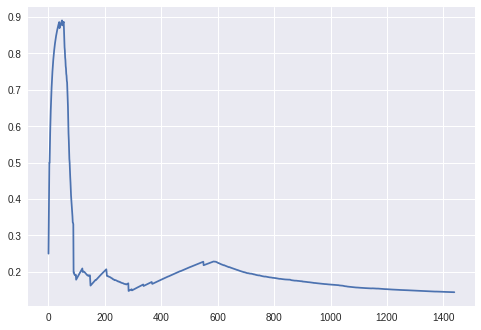

In [40]:
plt.plot(evaluation)


using constant timestep method $\alpha_n(a) = 0.1$

In [0]:
n_arms = 10
epsilon = 0.1
alpha = 0.1
n_epochs = 10000
# start the rewards at 1
R = [1.0]*n_arms

Q_old = 0
Q_new = 0
expected_rewards = [Q_old]*n_arms
Q_SA = []
Q_timestep = []
correct_choice = [] #keeping track of the ground truth of max value 
actions = [] # keeping track of our actions
for i in range(n_epochs):

    # upate rewards
    for j in range(len(R)):
        R[j] += np.random.normal(0, 0.01)
        
    # generate random number for e-greedy algo
    rand = np.random.uniform(0,1)
    
    # initial steps, choose 2 random arms
    if i == 0 or i == 1:
        choice = np.random.randint(0,10) # choose random arm
    
    # exploration step
    elif rand > 1-epsilon:
        choice = np.random.randint(0,10)

    # exploitation step    
    else: 
        # choose the arm with the highest expected reward
        choice = expected_rewards.index(max(expected_rewards)) 
        
    # updating values    
    Q_old = Q_new
    reward = R[choice]
#     Q_new = Q_old + 1/(i+1)*(reward - Q_old)
    Q_new = Q_old + alpha*(reward - Q_old)
    expected_rewards[choice] = Q_new # update expected rewards table with new Q values

    Q_SA.append(Q_new)
    
    # getting the correct choice to evaluate our actions
    correct_choice.append(R.index(max(R)))
    actions.append(choice)


In [52]:
print(Q_new)

2.9265984604519115


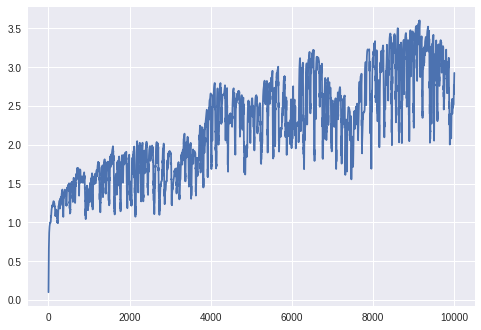

In [53]:
plt.plot(Q_SA)
# plt.show()

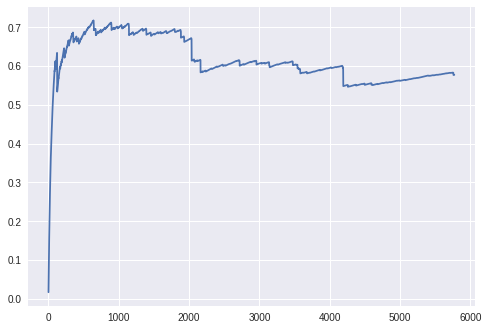

In [54]:
evaluation = evaluate_actions(actions, correct_choice)
plt.plot(evaluation)

Exploring with optimistic $Q_0 = 5$

When $Q_0 = 5 > R_1$, $Q_1$ becomes $Q_0+\alpha(R_0-Q_0) < Q_0$ which encourages more exploration

We need to initialize initial rewards table with $Q_0$ 



In [0]:
n_arms = 10
alpha = 0.1
n_epochs = 10000
# start the rewards at 1
R = [1.0]*n_arms


# greedy method eps = 0
# epsilon = 0

# epsilong greedy method 
epsilon = 0.1 

Q_old = 5
Q_new = 0
expected_rewards = [Q_old]*n_arms
Q_SA = []
Q_timestep = []
correct_choice = [] #keeping track of the ground truth of max value 
actions = [] # keeping track of our actions
for i in range(n_epochs):
    
    

    # upate rewards
    for j in range(len(R)):
        R[j] += np.random.normal(0, 0.01)
        
    # generate random number for e-greedy algo
    rand = np.random.uniform(0,1)
    
    # initial steps, choose 2 random arms
    if i == 0 or i == 1:
        choice = np.random.randint(0,10) # choose random arm
    
    # exploration step
    elif rand > 1-epsilon:
        choice = np.random.randint(0,10)

    # exploitation step    
    else: 
        # choose the arm with the highest expected reward
        choice = expected_rewards.index(max(expected_rewards)) 
        
    # updating values    
    Q_old = Q_new
    reward = R[choice]
#     Q_new = Q_old + 1/(i+1)*(reward - Q_old)
    Q_new = Q_old + alpha*(reward - Q_old)
    expected_rewards[choice] = Q_new # update expected rewards table with new Q values

    Q_SA.append(Q_new)
    
    # getting the correct choice to evaluate our actions
    correct_choice.append(R.index(max(R)))
    actions.append(choice)


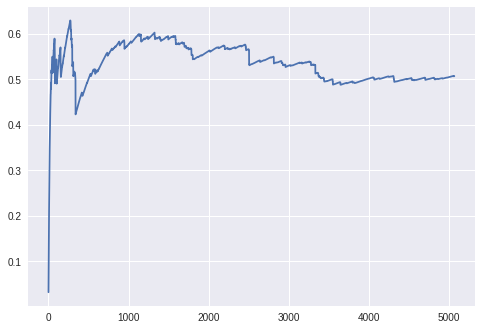

In [65]:
evaluation = evaluate_actions(actions, correct_choice)
plt.plot(evaluation)